# Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt

# Get unit 4 data in as 'data'

In [2]:
data = pd.read_csv('unit4.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [4]:
data.head()

STATE PVASTATE   DOB MDMAUD RECP3 GENDER DOMAIN  INCOME HOMEOWNR   HV1  ...  \
0    IL           3712   XXXX            F     T2     NaN            479  ...   
1    CA           5202   XXXX            M     S1     6.0        H  5468  ...   
2    NC              0   XXXX            M     R2     3.0        U   497  ...   
3    CA           2801   XXXX            F     R2     1.0        U  1000  ...   
4    FL           2001   XXXX     X      F     S2     3.0        H   576  ...   

   VETERANS  NUMPROM  CARDPROM  CARDPM12  NUMPRM12  MAXADATE  RFA_2  NGIFTALL  \
0                 74        27         6        14      9702    L4E        31   
1                 32        12         6        13      9702    L2G         3   
2                 63        26         6        14      9702    L4E        27   
3                 66        27         6        14      9702    L4E        16   
4                113        43        10        25      9702    L2F        37   

  TIMELAG    AVGGIFT  
0     4.0   7.741935  
1    18.0  15.666667  
2    12.0   7.481481  
3     9.0   6.812500  
4    14.0   6.864865  

[5 rows x 28 columns]

# Data quality check

## Duplicates

In [5]:
data.duplicated().sum() # check number of duplicates

1

In [6]:
data[data.duplicated(keep=False)] #see duplicates

STATE PVASTATE   DOB MDMAUD RECP3 GENDER DOMAIN  INCOME HOMEOWNR   HV1  \
36109    CA           4801   XXXX            F     U1     NaN           3365   
49464    CA           4801   XXXX            F     U1     NaN           3365   

       ...  VETERANS  NUMPROM  CARDPROM  CARDPM12  NUMPRM12  MAXADATE  RFA_2  \
36109  ...                 13         5         3         8      9702    L1F   
49464  ...                 13         5         3         8      9702    L1F   

       NGIFTALL TIMELAG  AVGGIFT  
36109         1     NaN     15.0  
49464         1     NaN     15.0  

[2 rows x 28 columns]

In [7]:
data.drop_duplicates(inplace=True, keep='first')

## Deal with other drops

In [8]:
# drop nulls or any obvious column?

## Reset index

In [9]:
data.info() # we can see that the index is not +1 than the 0 to 90568. This is because we droped a line. We should reset it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90568 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90568 non-null  object 
 1   PVASTATE  90568 non-null  object 
 2   DOB       90568 non-null  int64  
 3   MDMAUD    90568 non-null  object 
 4   RECP3     90568 non-null  object 
 5   GENDER    90568 non-null  object 
 6   DOMAIN    90568 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90568 non-null  object 
 9   HV1       90568 non-null  int64  
 10  HV2       90568 non-null  int64  
 11  HV3       90568 non-null  int64  
 12  HV4       90568 non-null  int64  
 13  IC1       90568 non-null  int64  
 14  IC2       90568 non-null  int64  
 15  IC3       90568 non-null  int64  
 16  IC4       90568 non-null  int64  
 17  IC5       90568 non-null  int64  
 18  VETERANS  90568 non-null  object 
 19  NUMPROM   90568 non-null  int64  
 20  CARDPROM  90568 non-null  in

In [10]:
data.reset_index(drop=True,inplace=True)

In [11]:
pd.set_option('display.max_columns', None) # To see all the columns (normally we only see the beginning and end of the table)

In [12]:
data.head()

STATE PVASTATE   DOB MDMAUD RECP3 GENDER DOMAIN  INCOME HOMEOWNR   HV1  \
0    IL           3712   XXXX            F     T2     NaN            479   
1    CA           5202   XXXX            M     S1     6.0        H  5468   
2    NC              0   XXXX            M     R2     3.0        U   497   
3    CA           2801   XXXX            F     R2     1.0        U  1000   
4    FL           2001   XXXX     X      F     S2     3.0        H   576   

    HV2  HV3  HV4   IC1   IC2   IC3   IC4    IC5 VETERANS  NUMPROM  CARDPROM  \
0   635    3    2   307   318   349   378  12883                74        27   
1  5218   12   10  1088  1096  1026  1037  36175                32        12   
2   546    2    1   251   292   292   340  11576                63        26   
3  1263    2    1   386   388   396   423  15130                66        27   
4   594    4    3   240   250   293   321   9836               113        43   

   CARDPM12  NUMPRM12  MAXADATE RFA_2  NGIFTALL  TIMELAG    AVGGIFT  
0         6        14      9702   L4E        31      4.0   7.741935  
1         6        13      9702   L2G         3     18.0  15.666667  
2         6        14      9702   L4E        27     12.0   7.481481  
3         6        14      9702   L4E        16      9.0   6.812500  
4        10        25      9702   L2F        37     14.0   6.864865

# Split the data into numericals and categoricals for EDA

In [13]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

# Numeric columns handling

In [14]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


In [15]:
d_num.describe()

DOB        INCOME           HV1           HV2           HV3  \
count  90568.000000  70386.000000  90568.000000  90568.000000  90568.000000   
mean    2724.419861      3.878257   1056.365814   1127.396586      4.213387   
std     2136.454475      1.855265    936.357737    942.138836      2.302247   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%      112.000000      2.000000    511.000000    553.000000      3.000000   
50%     2610.000000      4.000000    735.000000    800.000000      4.000000   
75%     4601.000000      5.000000   1206.000000   1320.000000      5.000000   
max     9710.000000      7.000000   6000.000000   6000.000000     13.000000   

                HV4           IC1           IC2           IC3           IC4  \
count  90568.000000  90568.000000  90568.000000  90568.000000  90568.000000   
mean       3.865383    339.368044    386.225897    386.688941    429.972684   
std        2.239625    162.383738    173.076543    160.938606    171.325839   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000    230.000000    273.000000    277.000000    314.000000   
50%        3.000000    309.000000    355.000000    353.000000    396.000000   
75%        5.000000    414.000000    464.000000    465.000000    513.000000   
max       13.000000   1500.000000   1500.000000   1500.000000   1500.000000   

                 IC5       NUMPROM      CARDPROM      CARDPM12      NUMPRM12  \
count   90568.000000  90568.000000  90568.000000  90568.000000  90568.000000   
mean    15681.854474     46.797578     18.370848      5.343433     12.837404   
std      8508.737296     22.944818      8.582028      1.207107      4.499929   
min         0.000000      4.000000      1.000000      0.000000      1.000000   
25%     10770.000000     27.000000     11.000000      5.000000     11.000000   
50%     13692.000000     46.000000     18.000000      6.000000     12.000000   
75%     18128.000000     64.000000     25.000000      6.000000     13.000000   
max    159306.000000    195.000000     61.000000     19.000000     78.000000   

           MAXADATE      NGIFTALL       TIMELAG       AVGGIFT  
count  90568.000000  90568.000000  80916.000000  90568.000000  
mean    9701.640602      9.501446      8.114378     13.428568  
std        5.679915      8.495065      8.310877     10.796408  
min     9611.000000      1.000000      0.000000      1.285714  
25%     9702.000000      3.000000      4.000000      8.454545  
50%     9702.000000      7.000000      6.000000     11.666667  
75%     9702.000000     13.000000     11.000000     15.625000  
max     9702.000000    237.000000   1088.000000   1000.000000

## Create a nulls df which summarises % of nulls per column

In [16]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num)) # percentage of nulls in numerical columns

In [17]:
nulls.reset_index(inplace=True) # create an index for the nulls df

In [18]:
nulls.columns=['column_name','percentage_nulls'] # define column names
nulls.sort_values(by='percentage_nulls', ascending=False) #sort the values
#This is our data quality snapshot

column_name  percentage_nulls
1       INCOME          0.222838
17     TIMELAG          0.106572
0          DOB          0.000000
10         IC5          0.000000
16    NGIFTALL          0.000000
15    MAXADATE          0.000000
14    NUMPRM12          0.000000
13    CARDPM12          0.000000
12    CARDPROM          0.000000
11     NUMPROM          0.000000
9          IC4          0.000000
8          IC3          0.000000
7          IC2          0.000000
6          IC1          0.000000
5          HV4          0.000000
4          HV3          0.000000
3          HV2          0.000000
2          HV1          0.000000
18     AVGGIFT          0.000000

## Choose method to deal with nulls

In [19]:
d_num['INCOME'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

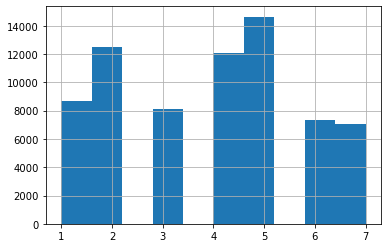

In [20]:
d_num['INCOME'].hist();

In [21]:
# We have different ways of dealing with nulls. 
# One option may be to replace them with the median, mode or mean or by other value we may think it's appropiate.
# But the most smart way would be to apply machine learning to predict the null values as we have the information of the rest of the columns.
# A worse option would be to remove rows and the worst to remove a whole column.
# The most important thing is to understand data: for example if a column of income has nulls it may be logic to substitute them by 0 (depending on the process to obtain the data)

In [22]:
d_num['INCOME'].median()

4.0

In [23]:
d_num['INCOME'].mean()

3.8782570397522234

In [24]:
d_num['INCOME'].mode()

0    5.0
Name: INCOME, dtype: float64

In [25]:
median_d=d_num['INCOME'].fillna(d_num['INCOME'].median())

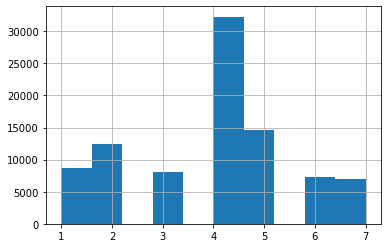

In [26]:
median_d.hist();

In [27]:
zero_d=d_num['INCOME'].fillna(0)

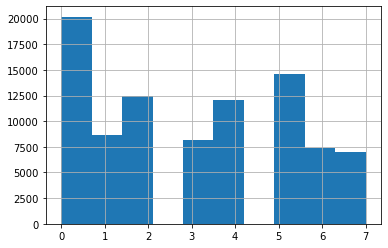

In [28]:
zero_d.hist();

## Apply chosen method to the data frame

In [29]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [30]:
import warnings
warnings.filterwarnings('ignore')

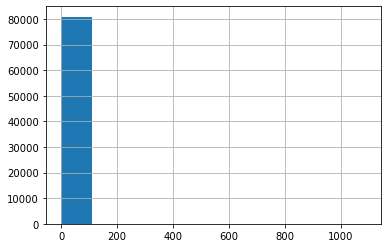

In [31]:
d_num['TIMELAG'].hist(); # we cannot see the distribution, we can check data to see what happens

In [32]:
d_num['TIMELAG'].value_counts() #last value looks as wrong data, we can filter (remove outliers) it to see if then we can have an idea of the distribution and decide how to deal with nulls

5.0       8106
4.0       8042
3.0       7995
6.0       6257
2.0       5900
          ... 
61.0         1
55.0         1
58.0         1
62.0         1
1088.0       1
Name: TIMELAG, Length: 67, dtype: int64

In [33]:
d_num.describe()

DOB        INCOME           HV1           HV2           HV3  \
count  90568.000000  90568.000000  90568.000000  90568.000000  90568.000000   
mean    2724.419861      3.014034   1056.365814   1127.396586      4.213387   
std     2136.454475      2.297785    936.357737    942.138836      2.302247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      112.000000      1.000000    511.000000    553.000000      3.000000   
50%     2610.000000      3.000000    735.000000    800.000000      4.000000   
75%     4601.000000      5.000000   1206.000000   1320.000000      5.000000   
max     9710.000000      7.000000   6000.000000   6000.000000     13.000000   

                HV4           IC1           IC2           IC3           IC4  \
count  90568.000000  90568.000000  90568.000000  90568.000000  90568.000000   
mean       3.865383    339.368044    386.225897    386.688941    429.972684   
std        2.239625    162.383738    173.076543    160.938606    171.325839   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000    230.000000    273.000000    277.000000    314.000000   
50%        3.000000    309.000000    355.000000    353.000000    396.000000   
75%        5.000000    414.000000    464.000000    465.000000    513.000000   
max       13.000000   1500.000000   1500.000000   1500.000000   1500.000000   

                 IC5       NUMPROM      CARDPROM      CARDPM12      NUMPRM12  \
count   90568.000000  90568.000000  90568.000000  90568.000000  90568.000000   
mean    15681.854474     46.797578     18.370848      5.343433     12.837404   
std      8508.737296     22.944818      8.582028      1.207107      4.499929   
min         0.000000      4.000000      1.000000      0.000000      1.000000   
25%     10770.000000     27.000000     11.000000      5.000000     11.000000   
50%     13692.000000     46.000000     18.000000      6.000000     12.000000   
75%     18128.000000     64.000000     25.000000      6.000000     13.000000   
max    159306.000000    195.000000     61.000000     19.000000     78.000000   

           MAXADATE      NGIFTALL       TIMELAG       AVGGIFT  
count  90568.000000  90568.000000  80916.000000  90568.000000  
mean    9701.640602      9.501446      8.114378     13.428568  
std        5.679915      8.495065      8.310877     10.796408  
min     9611.000000      1.000000      0.000000      1.285714  
25%     9702.000000      3.000000      4.000000      8.454545  
50%     9702.000000      7.000000      6.000000     11.666667  
75%     9702.000000     13.000000     11.000000     15.625000  
max     9702.000000    237.000000   1088.000000   1000.000000

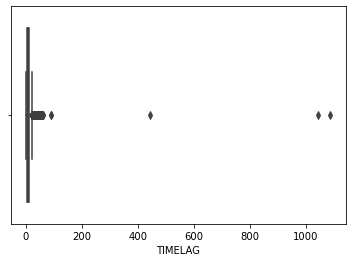

In [35]:
sns.boxplot(d_num['TIMELAG']); # Here we can see the outliers

In [ ]:
# Removing outliers then scatter plot again
- IQR (interquile ranges)
- upper limit
- exclude anything over upper limit
OR filter by a fixed limit

In [ ]:
# pd.cut or pd.qcut (first one defines limits as numbers and second one by quantiles)
# OR create function to bucket (if number is between 1-10 then...-a function that classifies)

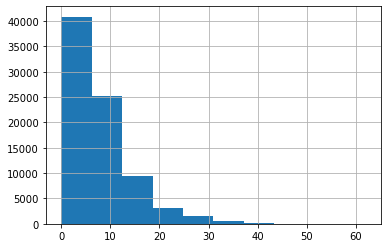

In [41]:
# Example of setting an upper limit:
timelag=d_num['TIMELAG']
timelag=timelag[timelag<80]
timelag.hist(bins=10);

# Now we can decide the best approach to deal with nulls